<a href="https://colab.research.google.com/github/Ishgar14/Mini-Project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plot

from skimage.transform import resize
from skimage.io import imread

In [5]:
goal = []
flatdata = []
SRCDIR = "/content/drive/MyDrive/Smartknower mini project data"
images = []

categories = ['Cats']

for c in categories:
    target = categories.index(c)
    path = os.path.join(SRCDIR, c)

    for image in os.listdir(path):
        img_matrix = imread(os.path.join(path, image))
        img_resized = resize(img_matrix, (150, 150, 3))
        flatdata.append(img_resized.flatten())
        images.append(img_resized)
        goal.append(target)

flatdata = np.array(flatdata)
goal = np.array(goal)
images = np.array(images)



In [6]:
df = pd.DataFrame(flatdata)
df['Goal'] = goal
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Goal
0,0.026471,0.018627,0.029412,0.026471,0.018627,0.029412,0.026471,0.018627,0.029412,0.026471,0.018627,0.029412,0.025490,0.017647,0.028431,0.020343,0.012500,0.022549,0.019608,0.011765,0.021569,0.019608,0.011765,0.021569,0.022794,0.014951,0.025490,0.023529,0.015686,0.025490,0.023529,0.018873,0.020098,0.023529,0.019608,0.003922,0.023529,0.019608,0.003922,0.023529,...,0.588480,0.513480,0.446814,0.594363,0.527206,0.460049,0.578186,0.513971,0.443137,0.589706,0.529167,0.456863,0.586029,0.524020,0.445833,0.576225,0.516667,0.435539,0.557843,0.502696,0.413480,0.587255,0.535784,0.441667,0.580637,0.533578,0.433578,0.528431,0.482843,0.380147,0.563725,0.522549,0.417647,0.575490,0.534559,0.428431,0.546078,0.477941,0.376961,0
1,0.139461,0.125490,0.117892,0.140931,0.125490,0.115686,0.146078,0.130392,0.115441,0.154902,0.133333,0.117647,0.166667,0.137255,0.113235,0.183578,0.146078,0.119118,0.202941,0.158824,0.125735,0.226471,0.175735,0.138235,0.250000,0.194363,0.155637,0.272059,0.212010,0.169608,0.279657,0.230637,0.181373,0.272304,0.257843,0.184314,0.280637,0.266176,0.191667,0.292402,...,0.650980,0.660784,0.585294,0.645098,0.656373,0.580637,0.636275,0.649755,0.575490,0.634314,0.644118,0.569853,0.617402,0.627206,0.548529,0.590931,0.600000,0.517647,0.566667,0.573529,0.486765,0.511520,0.519118,0.421324,0.458578,0.459559,0.359559,0.427206,0.429657,0.321324,0.371324,0.369363,0.261029,0.316422,0.314216,0.205882,0.284069,0.273775,0.187500,0
2,0.537255,0.521569,0.474510,0.537255,0.521569,0.474510,0.539216,0.523529,0.476471,0.541176,0.525490,0.478431,0.545098,0.529412,0.482353,0.545098,0.529412,0.482353,0.549020,0.533333,0.486275,0.549020,0.533333,0.486275,0.552941,0.537255,0.490196,0.554902,0.539216,0.492157,0.556863,0.541176,0.494118,0.558824,0.543137,0.496078,0.560784,0.545098,0.498039,0.562745,...,0.648588,0.589765,0.467843,0.682039,0.623216,0.507294,0.707765,0.647098,0.540863,0.719647,0.656902,0.554941,0.732902,0.670157,0.572235,0.744431,0.681686,0.589529,0.755843,0.693098,0.602902,0.776941,0.710275,0.631843,0.780863,0.714196,0.631843,0.780863,0.714196,0.628039,0.780863,0.718118,0.622392,0.803922,0.741176,0.643137,0.801843,0.739098,0.637255,0
3,0.353121,0.427631,0.482533,0.358275,0.433657,0.488559,0.368990,0.443500,0.498402,0.379775,0.454284,0.509186,0.390196,0.464706,0.519608,0.398618,0.473127,0.528029,0.409657,0.484167,0.539069,0.417098,0.492480,0.547382,0.424252,0.502614,0.557190,0.427846,0.513399,0.564379,0.434745,0.521020,0.572000,0.441683,0.527958,0.578938,0.448693,0.534967,0.585948,0.459804,...,0.892082,0.868552,0.876395,0.886526,0.862997,0.870840,0.881804,0.858275,0.866118,0.878536,0.855007,0.862850,0.874941,0.851412,0.859255,0.871892,0.848363,0.856206,0.870768,0.847490,0.855333,0.870588,0.847490,0.855333,0.870588,0.847490,0.855333,0.870588,0.847490,0.855333,0.867389,0.843895,0.851739,0.861216,0.828863,0.833765,0.859255,0.823961,0.827882,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
5,0.015686,0.011765,0.019608,0.015686,0.011765,0.01

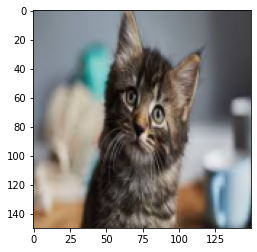

In [8]:
plot.imshow(images[-1])